**Welcome!**

This SkillShare is centered on working with Python and Jupyter Notebook to analyze oceanographic data. This notebook is your "cheat sheet," for when you get stuck on a problem and need to look at the working code.

First, a quick distinction:
- **Python** is a programming language, just like R, java script, C++, etc.
- **Jupyter Notebook** is a graphical user interface, or GUI, that lets us write Python code and run it easily. 

We are using Jupyter Notebooks on a remote server. If you wanted to run Jupyter Notebook on your own computer and save/download code, you would need to download Anaconda. Ask me after class if this is something you're interested in.

First, we are going to look at a few basic ideas in Python: what's a variable? A list? A string?

Then, we will import oceanographic data from my research in the Pacific Ocean, and use Python to analyze and visualize different aspects of it.

I have included some hokey "challenges" here if you want to play around with this code at home. If you ever have a question, get stuck, or need help, please ask!

In [3]:
# a variable
# In your blank notebook, type in the code below, 
# then hold shift+enter to run it

x = 1

In [4]:
# a list

newlist = [1,2,3,4,5]

In [5]:
# a string

string = 'Hello World!'

In [6]:
# showing a variable

print(string)

Hello World!


**Challenge: Can you get your notebook to print x (defined above)?**

In [7]:
# get the FIRST element of our list

newlist[0]

1

**Challenge: How do we get the fifth element of our list? (HINT: Unlike MatLab, we started counting at 0!)**

OK! We've got the basic machinery down. Now we're going to import some packages to do fancier stuff.

More terminology:
- **Packages** are additional sets of functionality that let us do things outside of the basic Python framework.
- **Pandas** is an awesome package for data management
- **Numpy** does math-y stuff
- **Matplotlib** plots graphs in python

We will give each of these packages a nickname: "pd","np", and "plt", so they're easier to access.

In [8]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# a numpy array

array = np.array([[1,2,3],[4,5,6]])

print(array)

[[1 2 3]
 [4 5 6]]


In [10]:
# get the first row of our array

array[0,:]

array([1, 2, 3])

In [11]:
# get the first column of our array

array[:,0]

array([1, 4])

In [12]:
# get the first element in the first row

array[0,0]

1

**Challenge: Can you access the third element of the third row?**

In [13]:
# a dataframe

df = pd.DataFrame(array)

df

,0,1,2
0,1,2,3
1,4,5,6


In [14]:
# rename columns and rows

df = df.rename(columns={0:'I',1:'Love',2:'Colette'})
df = df.rename(index={0:'So',1:'Much'})

df

,I,Love,Colette
So,1,2,3
Much,4,5,6


In [17]:
# dataframes are great because they contain an index:

df.index

Index(['So', 'Much'], dtype='object')

In [19]:
# reset the index to a different column

df2 = df.reset_index() # a second dataframe!

# make the 'Splash' column the index

df2.set_index('Colette')

,index,I,Love
Colette,,,
3,So,1,2
6,Much,4,5


**Challenge: Can you reset the index back to the original one?**

A quick overview of loops:

In [20]:
for i in range(3):
    print(i)

0
1
2


In [21]:
for i in range(3):
    print(newlist[i])

1
2
3


Now some plots — we'll start out with some fake data. 

More terminology:
- A **function** does a specific job, such as:
- **np.linspace**, which gives you a list of 50 numbers evenly spaced between two specified endpoints
- ...or **np.sin**, which calculates the sine of a given number

To make a plot, first we need to set up some axes. We'll do this with the "fig, ax = plt.subplots()" command. Then, we'll plot a sine curve.

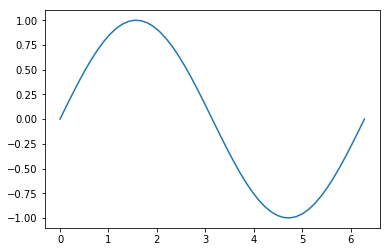

In [22]:
# make a plot

fig, ax = plt.subplots() # set up your axes

x = np.linspace(0,2*np.pi)
y = np.sin(x)

ax.plot(x,y)

OK, now we are FINALLY ready to read in some data. We'll use the Pandas package to do this.

In [30]:
cd 'data'

/Users/colette/Box Sync/Teaching/Python Skillshare/Data


In [33]:
ls

all_bottle_data.csv          ~$n2o no3 no2 isotopes.xlsx
n2o no3 no2 isotopes.xlsx


In [80]:
bottlefile = pd.read_csv('all_bottle_data.csv')
isotopes = pd.read_excel('isotopes.xlsx')

Let's check out what these dataframes look like...

In [81]:
# uncomment the below (take out the hash mark)
#bottlefile
#isotopes

What if we want to merge these into one dataset? The great thing about Pandas is that we can index data; below, we'll apply a multi-index to store our data by two nested variables ("Cast" and "Niskin") and then merge the two dataframes.

In [82]:
# rename the two key columns so that they match

bottlefile = bottlefile.rename(columns={'Niskin #':'Niskin', 'Cast #':'Cast'})

# apply the "groupby" function

bottlefile = bottlefile.set_index(['Cast','Niskin'])
isotopes = isotopes.set_index(['Cast','Niskin'])
# uncomment to look at the result
#bottlefile
#isotopes

In [83]:
# marge the two dataframes with the pandas "join" function
alldata = bottlefile.join(isotopes)

#uncomment to look at the result
#alldata

In [84]:
# list all of the columns

alldata.columns

Index(['Date', 'Time', 'Latitude [N]', 'Longitude [W]', 'CTD_Pressure [db]',
       'CTD_Depth [m]', 'Sigma_theta [kg/m3]', 'Salinity [psu]',
       'Temperature [C]', 'PAR [units?]', 'Oxygen [umol/L]', 'Cruise',
       'Station', 'Target Depth [m]', 'Nitrite [uM]',
       'NH4+ Concentration [nM]', 'Area 44', 'Flag', 'Identifier 1', 'RunDate',
       'dadj15N', 'dadj18O', 'mL added', 'nmol', 'sulfamic_treated', 'uM NO3-',
       'Area 44_2', 'Flag_2', 'Identifier 1_2', 'RunDate_2', 'dadj15N_2',
       'dadj18O_2', 'mL added_2', 'nmol_2', 'sulfamic_treated_2', 'uM NO3-_2',
       'Identifier 1_3', 'dadj18O_3', 'dadj15N_3', 'Area 44_3', 'nmol_3',
       'mL added_3', 'uM NO3-_3', 'Flag_3', 'RunDate_3', 'sulfamic_treated_3',
       'DA NO3_uM', 'd18NO3', 'd15NO3', 'NO3_mean', 'd18O_std', 'd15N_std',
       'NO3_std', 'd15NO2', 'd18NO2'],
      dtype='object')

What's with the NaN's? When we merged the two dataframes, Pandas populated rows that "bottefile" did but "isotopes" did not with NaN, or Not a Number. But we can pull out just the part of the dataframe with values in the isotopes columns. We'll use a numpy function called "isnan."

In [85]:
# this is called boolean indexing
alldata[np.isnan(alldata.d15NO3)==False]

Date     Time  Latitude [N]  Longitude [W]  \
Cast Niskin                                                      
2.0  1.0     Mar 19 2018  858.708      10.00000      113.00082   
     2.0     Mar 19 2018  172.000      10.00002      113.00084   
     3.0     Mar 19 2018  486.417      10.00002      113.00084   
     4.0     Mar 19 2018  643.042      10.00004      113.00084   
     5.0     Mar 19 2018  810.125      10.00002      113.00084   
     6.0     Mar 19 2018  976.958      10.00002      113.00084   
     7.0     Mar 19 2018  153.583      10.00002      113.00084   
     8.0     Mar 19 2018  301.542      10.00002      113.00084   
     9.0     Mar 19 2018  448.500      10.00002      113.00084   
     10.0    Mar 19 2018  611.625      10.00002      113.00082   
     12.0    Mar 19 2018  782.542      10.00002      113.00082   
3.0  1.0     Mar 19 2018  369.583      10.00007      113.00006   
     2.0     Mar 19 2018  496.000      10.00008      113.00004   
     3.0     Mar 19 2018  676.625      10.00008      113.00004   
     4.0     Mar 19 2018  842.875      10.00006      113.00004   
     5.0     Mar 19 2018  969.083      10.00008      113.00004   
     6.0     Mar 19 2018  118.208      10.00006      113.00004   
     7.0     Mar 19 2018  241.667      10.00006      113.00004   
     8.0     Mar 19 2018  397.583      10.00006      113.00006   
     9.0     Mar 19 2018  525.458      10.00008      113.00005   
     10.0    Mar 19 2018  639.458      10.00006      113.00006   
     11.0    Mar 19 2018  745.000      10.00006      113.00004   
     12.0    Mar 19 2018  902.500      10.00008      113.00005   
24.0 1.0     Mar 24 2018  833.083      12.50772      109.61002   
     2.0     Mar 24 2018  289.917      12.50774      109.61002   
     3.0     Mar 24 2018  721.000      12.50774      109.61002   
     4.0     Mar 24 2018  137.333      12.50772      109.61002   
     5.0     Mar 24 2018  536.000      12.50774      109.61002   
     6.0     Mar 24 2018  939.583      12.50774      109.61004   
     7.0     Mar 24 2018  277.250      12.50774      109.61004   
...                  ...      ...           ...            ...   
68.0 16.0    Jan 01 2000  900.750      17.33190      102.80886   
     17.0    Jan 01 2000   47.083      17.33186      102.80880   
     18.0    Jan 01 2000  178.917      17.33188      102.80882   
     19.0    Jan 01 2000  297.000      17.33192      102.80884   
     22.0    Jan 01 2000  824.125      17.33193      102.80888   
     24.0    Jan 01 2000  124.625      17.33186      102.80874   
69.0 1.0     Apr 04 2018  367.250      17.68334      102.35010   
     2.0     Apr 04 2018  583.833      17.68334      102.35000   
     3.0     Apr 04 2018  963.542      17.68332      102.35007   
     4.0     Apr 04 2018  347.625      17.68340      102.35004   
     5.0     Apr 04 2018  592.375      17.68330      102.35004   
     6.0     Apr 04 2018  920.708      17.68332      102.35007   
     7.0     Apr 04 2018  168.542      17.68334      102.35004   
     8.0     Apr 04 2018  343.792      17.68326      102.35004   
     9.0     Apr 04 2018  649.833      17.68336      102.35004   
     10.0    Apr 04 2018  873.792      17.68338      102.35006   
     11.0    Apr 04 2018  130.083      17.68334      102.35002   
     12.0    Apr 04 2018  351.375      17.68334      102.35004   
     13.0    Apr 04 2018  604.833      17.68334      102.35006   
     14.0    Apr 04 2018  822.750      17.68336      102.35004   
     15.0    Apr 04 2018   39.292      17.68333      102.35004   
     16.0    Apr 04 2018  231.125      17.68338      102.35004   
     17.0    Apr 04 2018  409.542      17.68340      102.35004   
     18.0    Apr 04 2018  654.500      17.68330      102.35004   
     19.0    Apr 04 2018  826.667      17.68328      102.35002   
     20.0    Apr 04 2018    0.667      17.68328      102.35004   
     21.0    Apr 04 2018  170.375      17.68332      102.35008   
     22.0    Apr 04 2018  345.875      17.68334      102.350

In [86]:
# get one specific column

depth = alldata['CTD_Depth [m]']

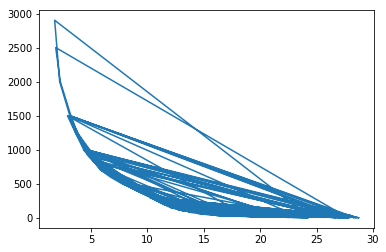

In [87]:
# plot all temperature data

fig, ax = plt.subplots()

ax.plot(alldata['Temperature [C]'],alldata['CTD_Depth [m]'])

(3000, 0)

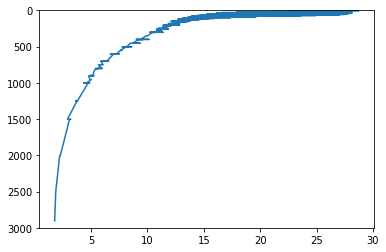

In [88]:
# that looks bad. let's sort by depth to make it better

data = alldata.sort_values('CTD_Depth [m]')

# let's also plot with the SURFACE (depth=0) at the TOP of our graph

fig, ax = plt.subplots()

ax.plot(data['Temperature [C]'],data['CTD_Depth [m]'])

ax.set_ylim([3000,0])

Text(0.5, 1.0, 'An awesome plot!')

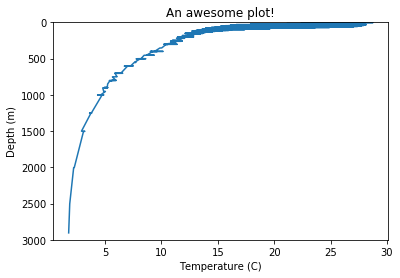

In [89]:
# add axis labels and a title

fig, ax = plt.subplots()

ax.plot(data['Temperature [C]'],data['CTD_Depth [m]'])

ax.set_ylim([3000,0])

ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (m)')
ax.set_title('An awesome plot!')

In [90]:
# pull out specific stations

ps1 = data[data.Station=='PS1']
ps2 = data[data.Station=='PS2']
t6 = data[data.Station=='T6']
ps3 = data[data.Station=='PS3']

In [92]:
# what did we just do?? Uncomment to check it out:

#ps1

(0, 250)

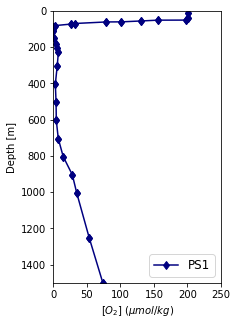

In [95]:
# A very fancy plot! Plot only one station:


yaxis = 'CTD_Depth [m]'
fsize=20
ylabel = 'Depth [m]'
msize=5

fig, ax = plt.subplots(1,1, figsize=(3,5))

# subplot 1: oxygen
ax.set_ylim([1500, 0])

ax.plot(ps1['Oxygen [umol/L]'], ps1[yaxis], marker='d',
          color='navy',label='PS1')


ax.legend(loc=4, fontsize=12)
ax.set_ylabel(ylabel)
ax.set_xlabel(r'$[O_2]\ (\mu mol/kg)$')
ax.set_xlim([0, 250])

(0, 250)

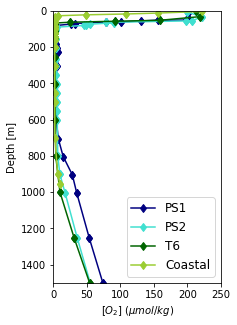

In [96]:
#  A very fancy plot! Plot FOUR stations:


yaxis = 'CTD_Depth [m]'
fsize=20
ylabel = 'Depth [m]'
msize=5

fig, ax = plt.subplots(1,1,figsize=(3,5))

# subplot 1: oxygen
ax.set_ylim([1500, 0])

ax.plot(ps1['Oxygen [umol/L]'], ps1[yaxis], marker='d',
          color='navy',label='PS1')
ax.plot(ps2['Oxygen [umol/L]'], ps2[yaxis], marker='d',
          color='turquoise',label='PS2')
ax.plot(t6['Oxygen [umol/L]'], t6[yaxis], marker='d',
          color='darkgreen',label='T6')
ax.plot(ps3['Oxygen [umol/L]'], ps3[yaxis], marker='d',
          color='yellowgreen', label='Coastal')

ax.legend(loc=4, fontsize=12)
ax.set_ylabel(ylabel)
ax.set_xlabel(r'$[O_2]\ (\mu mol/kg)$')
ax.set_xlim([0, 250])

**Data Challenge(s): Can you...**

1. Plot a temperature instead of oxygen?
2. Give the plots different colors?
3. Change the range of the y-axis?

Good luck!

In [97]:
pwd

'/Users/colette/Box Sync/Teaching/Python Skillshare/Data'